# This notebook illustrates why our accuracies are unrealistically high

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import random

# Fetching the dataset

In [2]:
data_exp_path = os.getcwd()
repo_path = os.path.abspath(os.path.join(data_exp_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

In [3]:
directory = original_dataset
dataset = []

categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

counter = 0
for category in categories:
    path = os.path.join(directory, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        brain_img = imread(imgpath, 0)
        image = np.array(brain_img).flatten()
        dataset.append([image, label])
        counter += 1
        
        if counter % 1000 == 0:
            print("Loaded", counter)

Loaded 1000
Loaded 2000
Loaded 3000
Loaded 4000
Loaded 5000
Loaded 6000


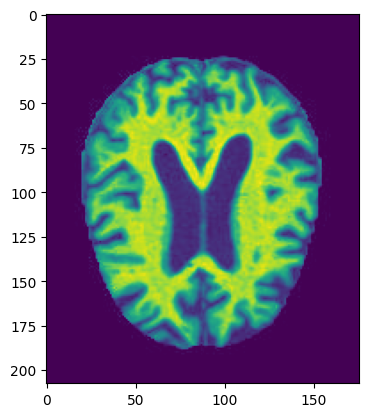

In [4]:
plt.imshow(dataset[0][0].reshape(208, 176))

# Now that we have the dataset loaded, let's verify that all images (regardless of class) do not have nonzero numbers in the first 20 rows and the last 10 rows!

In [5]:
# Here's an example on the first image (shown above)
copy = dataset[0][0][:200 * 20].flatten()
print(copy.shape)
print(np.unique(copy))

set_cast = set(copy)
print(set_cast)

(4000,)
[0]
{0}


### Testing on the first 10 rows of each image

In [6]:
# Moving onto the comparing all images

for image in dataset:
    pixels = image[0]
    cur_set = np.unique(pixels[:200 * 10].flatten())
    cur_set = set(cur_set)
    
    if cur_set != set([0]):
        print("BAD IMAGE! Class:", image[1])


### Testing on the first 14 rows

In [7]:
# Moving onto the comparing all images

for image in dataset:
    pixels = image[0]
    cur_set = np.unique(pixels[:200 * 14].flatten())
    cur_set = set(cur_set)
    
    if cur_set != set([0]):
        print("BAD IMAGE! Class:", image[1])

### Testing on the first 15 rows of each image


In [8]:
total_images_in_class = {}
bad_images_in_class = {}

index = 0
printed = False
for image in dataset:
    if image[1] not in total_images_in_class:
        total_images_in_class[image[1]] = 0
    total_images_in_class[image[1]] += 1
    pixels = image[0]
    cur = np.unique(pixels[:200 * 15].flatten())
    cur_set = set(cur)
    if not printed and cur_set != set([0]):
        print(index, image[1], cur[-200:])
    
    if cur_set != set([0]):
        if image[1] not in bad_images_in_class:
            bad_images_in_class[image[1]] = 0
        bad_images_in_class[image[1]] += 1
    index += 1

print(bad_images_in_class)

179 0 [ 0  1  2  3  4  5  6  7  8 10]
180 0 [ 0  1  2  3  4  5  7  9 10]
181 0 [ 0  1  2  3  4  5  6  7  9 11]
182 0 [ 0  1  2  3  4  5  6  7 10 12 17]
183 0 [ 0  1  2  4  5  6  7  8 10 12]
184 0 [ 0  1  2  3  5  6  8 10 15]
185 0 [0 1 2 3 4 5 7 8]
186 0 [0 1 2 3 4 5 6 7 9]
187 0 [ 0  1  2  3  4  5  6  7  9 16 17]
188 0 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 18]
189 0 [ 0  1  2  3  4  5  6  7  8 10 11 13 15]
190 0 [ 0  1  2  3  4  5  6  7  9 11 12 14]
191 0 [0 1 2 3 5 6 7]
192 0 [ 0  1  2  3  4  5  6  8  9 11 12]
193 0 [ 0  1  2  3  4  5  6  7 11 12 16 17]
194 0 [ 0  1  2  3  4  6  8 10 11 15]
195 0 [ 0  1  2  3  4  5  6  7  9 10 15]
196 0 [ 0  1  2  3  4  5  6  8 11 13 17]
197 0 [ 0  1  2  3  4  5  6  8  9 10 17]
198 0 [ 0  1  2  3  4  5  6  7  8 10 12 13]
199 0 [ 0  1  2  3  4  5  6 10 12]
200 0 [ 0  1  2  3  4  5  6  7  9 10 11]
201 0 [ 0  1  2  3  4  5  6  8 12 14]
202 0 [0 1 2 3 4 5 6 8 9]
203 0 [ 0  1  2  3  4  6  7  8 13]
204 0 [ 0  1  2  3  4  5  6  7  8 10]
205 0 [ 0  1  2  3

2147 2 [0 1 2 3 4 5 7 8 9]
2148 2 [0 1 2 3 5 6 7 8 9]
2149 2 [ 0  1  2  3  4  5  6  7 12]
2150 2 [ 0  1  2  3  4  5  6  8  9 12 13]
2151 2 [0 1 2 3 4 5 6 7]
2152 2 [0 1 2 3 4 5 6 7]
2153 2 [0 1 2 3 4 5 7 8 9]
2154 2 [ 0  1  2  3  4  5  6  7 15 25]
2155 2 [ 0  1  2  3  4  5  6  7  8  9 10 12 13]
2156 2 [ 0  1  2  3  4  6  7  9 10 11]
2157 2 [ 0  1  2  3  4  5  6  7 11]
2158 2 [ 0  1  2  3  4  5  6  7  8 11 17]
2159 2 [ 0  1  2  3  4  5  6  7  9 12]
2160 2 [ 0  1  2  3  4  5  7 14]
2161 2 [ 0  1  2  3  4  6 17]
2162 2 [0 1 2 3 4 5 9]
2163 2 [0 1 2 3 4 5 6 9]
2164 2 [ 0  1  2  3  4  5  7  8 11 14]
2165 2 [ 0  1  2  3  4  5  6  7  9 11 13]
2166 2 [0 1 2 3 4 5 6 7 8]
2167 2 [ 0  1  2  3  4  5  6  7  8 11 12 14]
2168 2 [ 0  1  2  3  4  5  6  7  8  9 16]
2169 2 [ 0  1  2  3  4  5  7  8  9 10 16]
2170 2 [ 0  1  2  3  4  5  6  7  8  9 11 13 16]
2171 2 [ 0  1  2  3  4  5  8 11]
2172 2 [0 1 2 3 4 8]
2173 2 [0 1 2 3 4 5 6]
2174 2 [ 0  1  2  4  5  7  8 13 14]
2175 2 [0 1 2 3 4 5 7 9]
2176 2 [ 0  1 

3844 2 [ 0  1  2  3  4  5  7  8  9 14]
3845 2 [ 0  1  2  3  4  5  6 11]
3846 2 [ 0  1  2  3  5  6  7 11 12 17]
3847 2 [ 0  1  2  3  4  5  6  7  9 11 14 19]
3848 2 [ 0  1  2  3  4  6  7  8 11 14]
3849 2 [ 0  1  2  3  4  5  6  7  8 10 12 14 15 20]
3850 2 [ 0  1  2  3  4  5  6  7  9 10 11]
3851 2 [0 1 2 3 4 5 6]
3852 2 [ 0  1  2  3  4  5  6  7  8  9 10 12 15 16]
3853 2 [ 0  1  2  3  4  5  6  7 10 12 14]
3854 2 [ 0  1  2  3  4  5  7  8  9 11]
3855 2 [ 0  1  2  3  4  5  6  8  9 11 19]
3856 2 [0 1 2 3 4 5]
3857 2 [ 0  1  2  3  4  5  6  8 10 13]
3858 2 [ 0  1  2  3  4  7  8  9 15]
3859 2 [ 0  1  2  3  4  5  6  7 12 21]
3860 2 [ 0  1  2  3  4  5  6  7  8 11 14]
3861 2 [ 0  1  2  4  5  6  7  9 10 13]
3862 2 [ 0  1  2  3  4  5  7  8 10 15]
3863 2 [ 0  1  2  3  4  5  6  7  8  9 10 13]
3864 2 [ 0  1  2  3  4  5  6  7  8 10 14]
3865 2 [ 0  1  2  3  4  5  6  7 11 13]
3866 2 [ 0  1  2  3  4  5  6  7  8 18]
3867 2 [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
3868 2 [ 0  1  2  3  4  6  9 10 12 14 15 17 

5839 3 [ 0  1  2  3  4  5  6  8  9 12 14 21]
5840 3 [ 0  1  2  3  4  5  7 11]
5841 3 [ 0  1  2  3  4  5  6  7  9 10 21]
5842 3 [ 0  1  2  3  4  6 16]
5843 3 [ 0  1  2  3  4  5  6  9 10 12 13 14]
5844 3 [ 0  1  2  3  4  5  6  7  8  9 12 14 16 17]
5845 3 [ 0  1  2  3  4  5  6  7 10]
5846 3 [ 0  1  2  3  4  5  6  7  8  9 10]
5847 3 [ 0  1  2  3  4  5  6  7  8  9 10 13 16]
5848 3 [ 0  1  2  3  4  5  6  7  8  9 10 14]
5849 3 [ 0  1  2  3  4  5  6  7 10 11]
5850 3 [ 0  1  2  3  4  5  6  7  8  9 14]
5851 3 [ 0  1  2  3  4  5  6  7  8  9 10 16]
5852 3 [ 0  1  2  3  4  5  6  7  8 12]
5853 3 [ 0  1  2  3  4  6  7 10 12 13 17]
5854 3 [ 0  1  2  3  4  5  6  7  8 13 14]
5855 3 [ 0  1  2  3  4  5  6  7  8  9 15 18]
5856 3 [ 0  1  2  3  4  5  6  7  8 10 11]
5857 3 [ 0  1  2  3  5  6  7  9 11 15]
5858 3 [ 0  1  2  3  4  5  6  8 14]
5859 3 [ 0  1  2  3  4  5  6  7 10 15]
5860 3 [ 0  1  2  3  4  5  6  8  9 10 11 13 15]
5861 3 [ 0  1  2  3  4  5 10]
5862 3 [ 0  1  2  3  4  5  6  7  8 10 12]
5863 3 [0 1 2

In [9]:
print(bad_images_in_class)

{0: 616, 1: 44, 2: 2200, 3: 1540}


### Testing on the first 21 rows

In [10]:
total_images_in_class = {}
bad_images_in_class = {}

index = 0
printed = False
for image in dataset:
    if image[1] not in total_images_in_class:
        total_images_in_class[image[1]] = 0
    total_images_in_class[image[1]] += 1
    pixels = image[0]
    cur = np.unique(pixels[:200 * 21].flatten())
    cur_set = set(cur)
    
    if cur_set != set([0]):
        if image[1] not in bad_images_in_class:
            bad_images_in_class[image[1]] = 0
        bad_images_in_class[image[1]] += 1
    index += 1

print(bad_images_in_class)

{0: 616, 1: 44, 2: 2200, 3: 1540}


### Testing on the first 22 rows

In [11]:
total_images_in_class = {}
bad_images_in_class = {}

index = 0
printed = False
for image in dataset:
    if image[1] not in total_images_in_class:
        total_images_in_class[image[1]] = 0
    total_images_in_class[image[1]] += 1
    pixels = image[0]
    cur = np.unique(pixels[:200 * 22].flatten())
    cur_set = set(cur)
    
    if cur_set != set([0]):
        if image[1] not in bad_images_in_class:
            bad_images_in_class[image[1]] = 0
        bad_images_in_class[image[1]] += 1
    index += 1

print(bad_images_in_class)

{0: 896, 1: 64, 2: 3200, 3: 2240}


# Here is an example from above

### These two brains are ~800 images apart, and are of the same brain
### All images in between these two indices are also the same brain

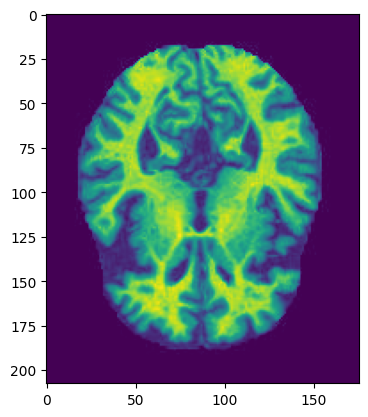

In [12]:
plt.imshow(dataset[190][0].reshape(208, 176))

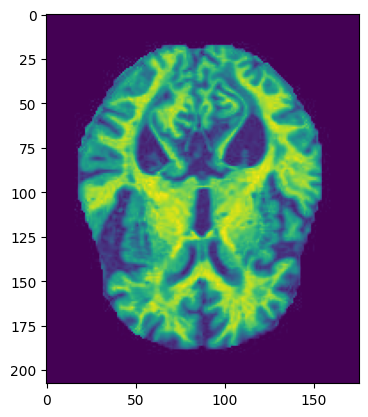

In [13]:
plt.imshow(dataset[895][0].reshape(208, 176))

# CONCLUSION:
### THERE ARE DEFINITELY HUNDREDS OF SCANS OF THE SAME BRAIN AT DIFFERENT LEVELS OF THE MRI SCAN. OUR TRAINING IS NOT PICKING UP ON METADATA, IT IS JUST EXTREMELY EASY TO CLASSIFY AN IMAGE WITH OTHER IMAGES OF THE SAME BRAIN